In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('spam.tsv', sep='\t')

In [124]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [126]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [127]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


Length can give us some insight

In [128]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Highly imbalanced data

Downsampling

In [129]:
hem = df[df['label']=='ham']
hem = hem.sample(747)
data = hem.append(df[df['label']=='spam'])

[]

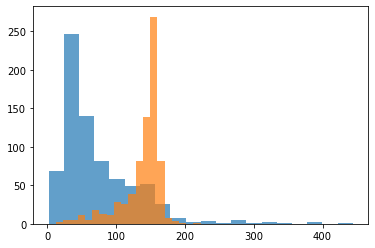

In [130]:
plt.hist(data[data['label']=='ham']['length'], bins=20, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=20, alpha=0.7)
plt.plot()

As the message length increases it can be spam

[]

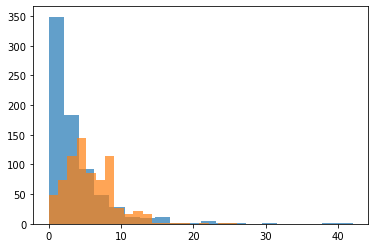

In [131]:
plt.hist(data[data['label']=='ham']['punct'], bins=20, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=20, alpha=0.7)
plt.plot()

#### Preprocessing of data

In [132]:
import nltk
import re

In [133]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RUPESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RUPESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [135]:
from nltk.corpus import stopwords

In [136]:
data.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

Taking one message

In [137]:
review = data.iloc[0,1]

only accepting alphabets regecting all

In [138]:
review = re.sub('[^a-zA-Z]', ' ', review)

putting all string to lower case

In [139]:
review = review.lower()

In [140]:
review = review.split()

In [141]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [142]:
review_s=[]
for word in review:
    if word not in stopwords.words('english'):
        review_s.append(word)

In [143]:
review_s

['hi', 'durban', 'still', 'number']

In [144]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [145]:
review = [wnl.lemmatize(word) for word in review_s]

In [146]:
review

['hi', 'durban', 'still', 'number']

In [147]:
review = ' '.join(review) 

Looping preprocessing for whole data

In [150]:
corp = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i,1])
    review = review.lower()
    review = review.split()
    review = [wnl.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review) 
    corp.append(review)

In [151]:
corp

['hi durban still number',
 'try something dear read something exam',
 'ffffffffff alright way meet sooner',
 'dunno jus say go lido time',
 'g want know fuck',
 'way put skip right outside front house see house pull',
 'nope going home go pump petrol lor like going rain soon',
 'baaaaaaaabe wake miss crave need',
 'could work reach consensus next meeting',
 'working ringing u thing whole houseful screaming brat pulling hair loving u',
 'yes fine',
 'lt decimal gt common car better buy china asia find le expensive holla',
 'nope b going sch fri quite early lor co mys si got paper da morn',
 'u really pig leh sleep much dad wake smth eat lunch today',
 'get ten billion call text help god',
 'luv u soo much u understand special u r ring u morrow luv u xxx',
 'dear sleeping p',
 'sent score sophas secondary application school think thinking applying research cost also contact joke ogunrinde school one le expensive one',
 'well might come',
 'go tell friend sure want live smoke much spend 

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 2500)

In [153]:
X = tv.fit_transform(corp).toarray()

In [154]:
y = pd.get_dummies(data['label'])

In [155]:
y = y.iloc[:,0].values

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Using Naive Bayes Algorithm

In [157]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [158]:
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [159]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [160]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9063545150501672
[[136  12]
 [ 16 135]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       148
           1       0.92      0.89      0.91       151

    accuracy                           0.91       299
   macro avg       0.91      0.91      0.91       299
weighted avg       0.91      0.91      0.91       299



Using Random forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [162]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [163]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9565217391304348
[[138  10]
 [  3 148]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       148
           1       0.94      0.98      0.96       151

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299



Using SVM

In [164]:
from sklearn.svm import SVC
svm = SVC() 

In [165]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [166]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test, y_pred))

0.9498327759197325
[[134  14]
 [  1 150]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       148
           1       0.91      0.99      0.95       151

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299

